# GRAD-CAM

## Setup

In [1]:
%pip install fastai==2.5.3 matplotlib_venn palettable -q
%pip freeze

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
aggdraw==1.3.15
appnope==0.1.2
backcall==0.2.0
blis==0.7.7
catalogue==2.0.7
certifi==2022.5.18.1
charset-normalizer==2.0.12
cleanlab==2.2.0
click==8.1.3
cycler==0.11.0
cymem==2.0.6
debugpy==1.4.1
decorator==5.0.9
exif==1.5.0
fastai==2.5.3
fastcore==1.3.29
fastdownload==0.0.6
fastprogress==1.0.2
fonttools==4.33.3
idna==3.3
ipykernel==6.0.3
ipython==7.26.0
ipython-genutils==0.2.0
jedi==0.18.0
Jinja2==3.1.2
joblib==1.1.0
jupyter-client==6.1.12
jupyter-core==4.7.1
kiwisolver==1.4.2
langcodes==3.3.0
loguru==0.6.0
markdown-it-py==2.1.0
MarkupSafe==2.1.1
matplotlib==3.5.2
matplotlib-inline==0.1.2
matplotlib-venn==0.11.7
mdurl==0.1.2
murmurhash==1.0.7
numpy==1.22.4
packaging==21.3
palettable==3.3.0
pandas==1.4.2
parso==0.8.2
pathy==0.6.1
pexpect==4.8.0
pickleshare==0.7.5
Pillow==9.1.1
plum-py==0.8.5
preshed==3.0.

In [2]:
# test id running in macos or linux
import platform
print(platform.system())

import os
if platform.system() == 'Darwin':
    os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np

Darwin


In [3]:
%pip install cleanlab loguru upyog

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Exepriment Configuration

In [4]:
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell
import sys

external_python_file_path="/home/studio-lab-user/code"
sys.path.append(external_python_file_path)

In [5]:
from ml4measurement.eb_ml_utils import build_learner
from fastai.vision.all import *

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import yaml

config_file = '../config/config.yaml'

#Read the configuration
with open(config_file) as cfg_file:
    config = yaml.load(stream = cfg_file, Loader = yaml.FullLoader)

In [7]:
config['Splitter'] = RandomSplitter(valid_pct=0.3, seed=41)
config['rePat'] = r'^.*_(\d+).png$'

In [8]:
saved_weights ="Paper_MES_v2_leave_one_out_BATT05_Exp_1_1674172695.466371_SAVED"
config['IMAGES_PATH'] = '../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1'
config['TEST_IMAGES_PATH'] = '../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1'

# BUILD LEARNER
learn = build_learner(config)

learn = learn.load(saved_weights)

Setting-up type transforms pipelines
Found 1200 items
2 datasets of sizes 840,360
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-02_9004_10.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-02_9004_10.png
    applying RegexLabeller gives
      10
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(0))


Found 1200 items
2 datasets of sizes 840,360
Setting up Pipeline: PILBase.create
Setting up

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


In [9]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])

## GRAD-CAM

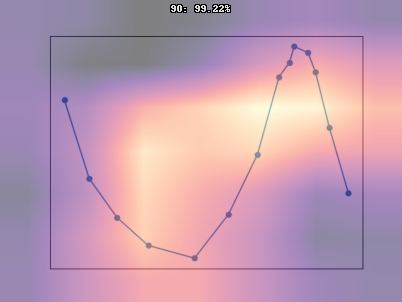

In [17]:
from fastai_amalgam.interpret.all import *

learn.gradcam(test_fnames[0], gcam_cmap='magma')

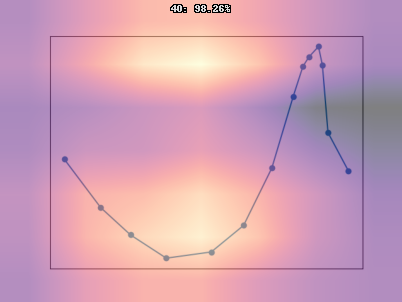

In [20]:
learn.gradcam(test_fnames[1], gcam_cmap='magma')

In [21]:
test_fnames[1]

Path('../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-03_8004_40.png')

test_fnames[1]

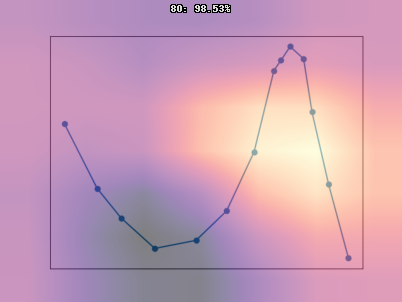

In [23]:
learn.gradcam(test_fnames[2], gcam_cmap='magma')

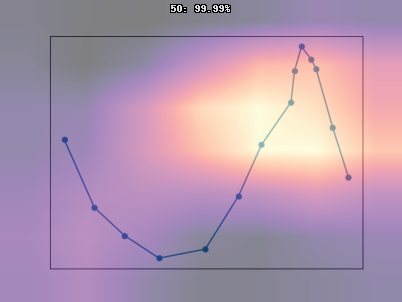

In [27]:
learn.gradcam(test_fnames[3], gcam_cmap='magma')

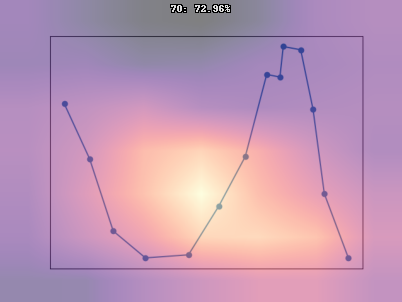

In [26]:
learn.gradcam(test_fnames[5], gcam_cmap='magma')

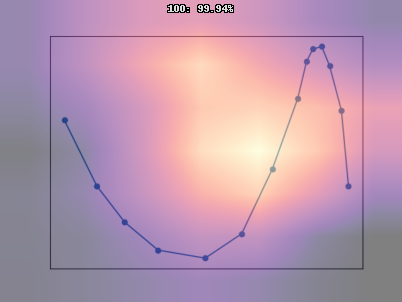

In [28]:
learn.gradcam(test_fnames[6], gcam_cmap='magma')

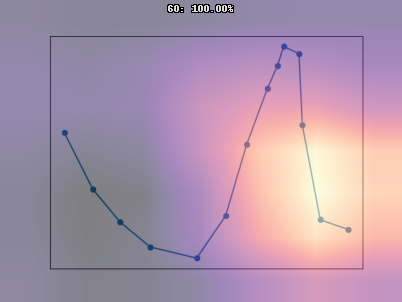

In [29]:
learn.gradcam(test_fnames[8], gcam_cmap='magma')